In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Stats Intro

In [2]:
parkinsons_dataset = pd.read_csv("../datasets/parkinsons.csv")    #importing heart dataset into a variable | Dataframe | ../ = current repo (PREDICTIONS)

In [3]:
parkinsons_dataset.head()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_per,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinsons_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             195 non-null    object 
 1   MDVP_Fo_Hz       195 non-null    float64
 2   MDVP_Fhi_Hz      195 non-null    float64
 3   MDVP_Flo_Hz      195 non-null    float64
 4   MDVP_Jitter_per  195 non-null    float64
 5   MDVP_Jitter_Abs  195 non-null    float64
 6   MDVP_RAP         195 non-null    float64
 7   MDVP_PPQ         195 non-null    float64
 8   Jitter_DDP       195 non-null    float64
 9   MDVP_Shimmer     195 non-null    float64
 10  MDVP_Shimmer_dB  195 non-null    float64
 11  Shimmer_APQ3     195 non-null    float64
 12  Shimmer_APQ5     195 non-null    float64
 13  MDVP_APQ         195 non-null    float64
 14  Shimmer_DDA      195 non-null    float64
 15  NHR              195 non-null    float64
 16  HNR              195 non-null    float64
 17  status          

In [5]:
parkinsons_dataset.describe()   #statistics of dataset

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_per,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
parkinsons_dataset['status'].value_counts()   # to access a particular column

status
1    147
0     48
Name: count, dtype: int64

In [7]:
parkinsons_dataset['status']   # count the number of diabetic and non diabetic patients

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

***Data is imbalanced here, This can lead to biased models that perform well on the majority class but poorly on the minority class. Common techniques to handle imbalanced data include resampling (like SMOTE or undersampling)***

### Preprocessing of data

In [8]:
X = parkinsons_dataset.drop(columns=['name','status'], axis=1)   # Stored dataframe in X axis except 'status'  and 'name' column | name is independent thus it's removed
Y = parkinsons_dataset['status']   # Stored status in Y axis 

In [9]:
print(parkinsons_dataset.dtypes)


name                object
MDVP_Fo_Hz         float64
MDVP_Fhi_Hz        float64
MDVP_Flo_Hz        float64
MDVP_Jitter_per    float64
MDVP_Jitter_Abs    float64
MDVP_RAP           float64
MDVP_PPQ           float64
Jitter_DDP         float64
MDVP_Shimmer       float64
MDVP_Shimmer_dB    float64
Shimmer_APQ3       float64
Shimmer_APQ5       float64
MDVP_APQ           float64
Shimmer_DDA        float64
NHR                float64
HNR                float64
status               int64
RPDE               float64
DFA                float64
spread1            float64
spread2            float64
D2                 float64
PPE                float64
dtype: object


In [10]:
X.head()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_per,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

#### Splitting Data for Training and Testing

In [12]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=111)  # Splitting Data

# UnderSampling (Imbalance Data)

In [13]:
# Define the undersampler
undersampler = RandomUnderSampler(random_state=111)

# Apply undersampling
X_train_undersampled, Y_train_undersampled = undersampler.fit_resample(X_train, Y_train)  #Resampled features (`X_resampled`) and target labels (`Y_resampled`).

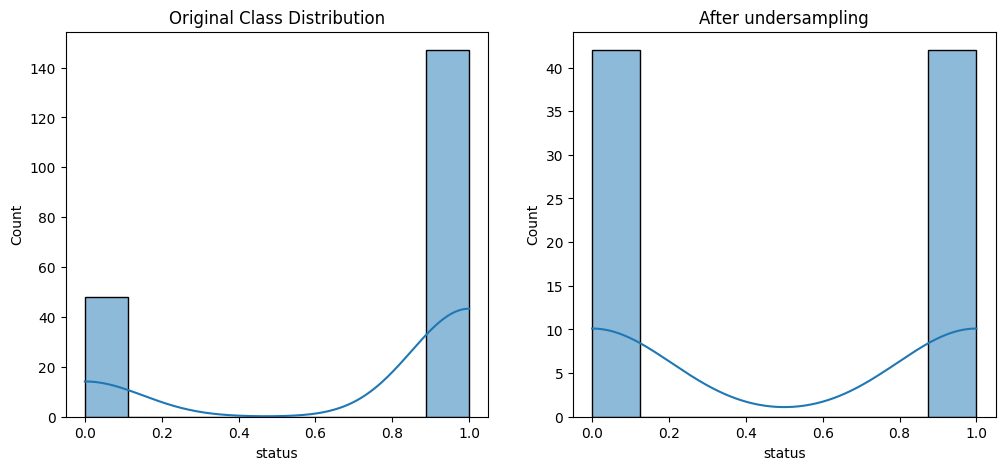

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(Y_train_undersampled, kde=True, ax=axes[1])
axes[1].set_title("After undersampling")

# Show the plots
plt.show()

# Training Models

###  SVM model (UnderSampled)

In [15]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_undersampled, Y_train_undersampled)  # Retrain with the resampled data

y_pred = model.predict(X_test)   

0.7692307692307693
              precision    recall  f1-score   support

           0       0.38      0.83      0.53         6
           1       0.96      0.76      0.85        33

    accuracy                           0.77        39
   macro avg       0.67      0.80      0.69        39
weighted avg       0.87      0.77      0.80        39



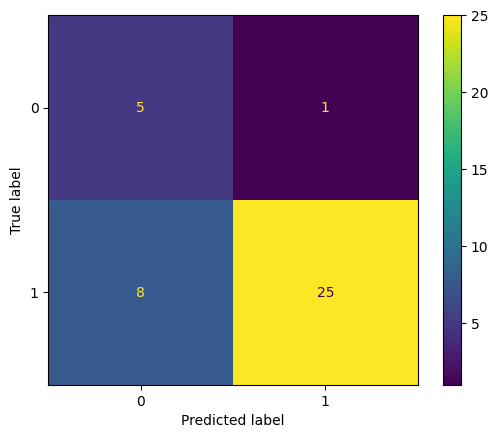

In [16]:
print(accuracy_score(Y_test,y_pred))

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Generate the classification report
report = classification_report(Y_test, y_pred)

# Print the report
print(report)


### Logistic Regression (UnderSampled)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_undersampled, Y_train_undersampled)

y_pred = model.predict(X_test)

0.7948717948717948
              precision    recall  f1-score   support

           0       0.42      0.83      0.56         6
           1       0.96      0.79      0.87        33

    accuracy                           0.79        39
   macro avg       0.69      0.81      0.71        39
weighted avg       0.88      0.79      0.82        39



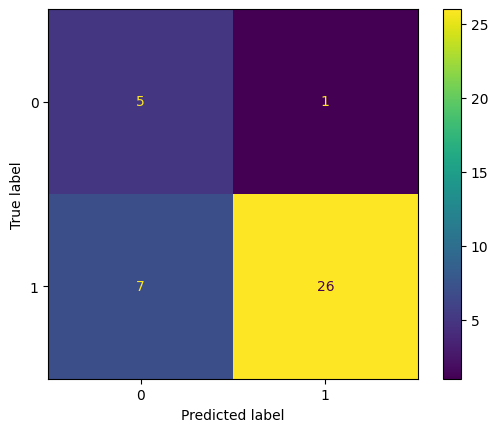

In [18]:
print(accuracy_score(Y_test,y_pred))

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Generate the classification report
report = classification_report(Y_test, y_pred)

# Print the report
print(report)

### Random Forest (UnderSampled)

In [19]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=111)

# Train the model
model.fit(X_train_undersampled, Y_train_undersampled)

# Make predictions
y_pred = model.predict(X_test)

0.7692307692307693
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         6
           1       1.00      0.73      0.84        33

    accuracy                           0.77        39
   macro avg       0.70      0.86      0.71        39
weighted avg       0.91      0.77      0.80        39



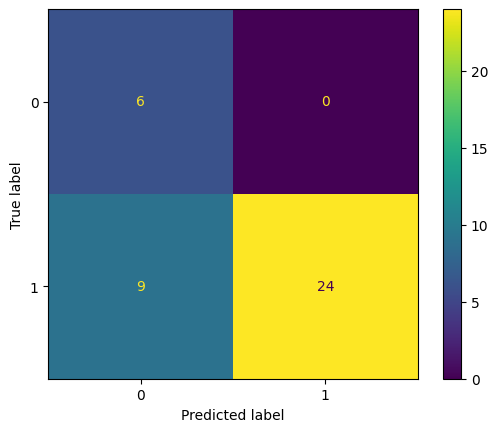

In [20]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(accuracy_score(Y_test,y_pred))
report = classification_report(Y_test, y_pred)
print(report)

**using tomek link is overfitting the minor class, so we'll not use tomek**

# OverSampling 
__(We'll use oversampling here because dataset is samall and important data might loss in undersampling)__

In [21]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Oversample minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train) # Oversam Data

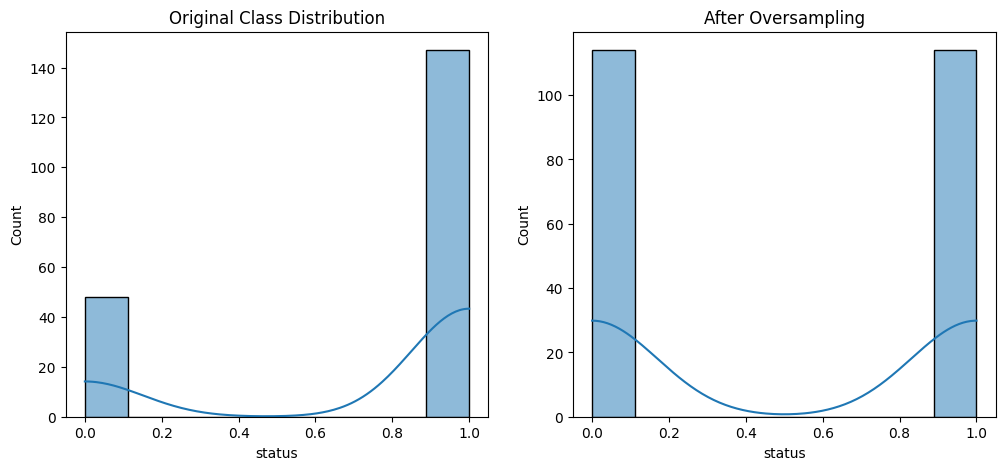

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(y_train_smote, kde=True, ax=axes[1])
axes[1].set_title("After Oversampling")

# Show the plots
plt.show()

### Random Forest (Oversampled) 

In [23]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)


report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        33

    accuracy                           0.97        39
   macro avg       0.93      0.98      0.95        39
weighted avg       0.98      0.97      0.98        39



### Logistic Regression (Oversampled)

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.83      0.53         6
           1       0.96      0.76      0.85        33

    accuracy                           0.77        39
   macro avg       0.67      0.80      0.69        39
weighted avg       0.87      0.77      0.80        39



### SVM (OverSampled)

In [25]:
model = svm.SVC(kernel='linear')  # Reinitialize the model
model.fit(X_train_smote, y_train_smote)  # Retrain with the resampled data

y_pred = model.predict(X_test)

report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.43      1.00      0.60         6
           1       1.00      0.76      0.86        33

    accuracy                           0.79        39
   macro avg       0.71      0.88      0.73        39
weighted avg       0.91      0.79      0.82        39



## Tomek Link 

In [26]:
tomek_links = TomekLinks()
X_resampled, Y_resampled = tomek_links.fit_resample(X_train_smote, y_train_smote) 

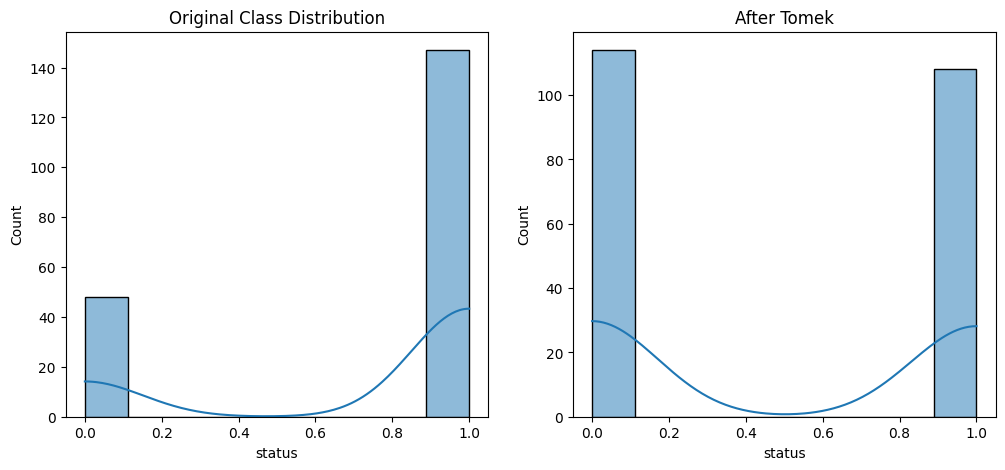

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title("Original Class Distribution")

# Class distribution after oversampling
sns.histplot(Y_resampled, kde=True, ax=axes[1])
axes[1].set_title("After Tomek")

# Show the plots
plt.show()

**using tomek link is overfitting the minor class, so we'll not use tomek**

## Final Model ✅

### RaNDOM fOREST (Oversampled) ✅
**Choose Random Forest with oversampling because it achieves the highest recall, and precision minimizing missed diabetic cases while maintaining strong overall performance**

In [28]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)


report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        33

    accuracy                           0.97        39
   macro avg       0.93      0.98      0.95        39
weighted avg       0.98      0.97      0.98        39



In [29]:
import pickle   # pickle serialize or desiralize python objects and save them in file
filename = "parkinsons_model.sav"  # .sav is used for saving models
pickle.dump(model, open(filename, 'wb'))   # open(filename, 'wb') opens the file in write-binary mode (wb). This mode allows the byte stream generated by pickle.dump() to be written to the file
